Build an AI Agentic System using CrewAI and Langfuse

In this assignment, you will choose one use case from the list below to build a multi-agent AI system using **CrewAI** for orchestration and **Langfuse** for observability.

You are free to explore and expand your chosen use case as long as it fits within the multi-agent framework.

## Use Case

 *Educational Course Recommender*  
   - Agents evaluate user interests and recommend relevant learning paths.



## Setup Instructions

Before starting, install the required packages.

In [1]:
!pip install crewai langfuse openai
!pip install crewai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.1/327.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.3/294.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.5 MB/s e

In [2]:
import os

# Set Langfuse credentials and host for tracking
os.environ["LANGFUSE_PUBLIC_KEY"] = "key here"
os.environ["LANGFUSE_SECRET_KEY"] = "key here"
os.environ["LANGFUSE_HOST"] = "https://cloud.langfuse.com"

In [3]:
from langfuse import Langfuse
from langfuse.openai import openai

# Initialize the Langfuse client
langfuse = Langfuse()

In [4]:
class InterestAnalyzerAgent:
    def __init__(self):
        self.langfuse = Langfuse()

    def run(self, user_input: str):
        # Start a Langfuse trace and span
        trace = self.langfuse.trace(name="InterestAnalyzer")
        span = trace.start_span(name="analyze_interests")

        try:
            # Super basic keyword extraction (just an example)
            words = user_input.lower().split()
            keywords = [word.strip(",.") for word in words if word.isalpha()]

            # Log output to Langfuse
            span.log_output({"interests": keywords})
            return keywords
        finally:
            span.end()


In [5]:
# Mock data representing available courses and their tags
MOCK_COURSES = [
    {"title": "Intro to AI", "tags": ["ai", "basics", "machine learning"]},
    {"title": "Deep Learning Specialization", "tags": ["deep learning", "neural networks"]},
    {"title": "Fashion Tech: AI Meets Design", "tags": ["fashion", "ai", "design"]},
    {"title": "Python for Data Science", "tags": ["python", "data science"]},
]

In [6]:
from langfuse import Langfuse

class CourseMatcherAgent:
    def __init__(self):
        self.langfuse = Langfuse()

    def run(self, interests: list):
        trace = self.langfuse.trace(name="CourseMatcher")
        span = trace.start_span(name="match_courses")

        try:
            # Match courses that contain any of the user's interests
            matches = [
                course for course in MOCK_COURSES
                if any(interest in course["tags"] for interest in interests)
            ]

            # Log matched results to Langfuse
            span.log_output({"matched_courses": matches})
            return matches
        finally:
            span.end()

In [7]:
from langfuse import Langfuse

class PathDesignerAgent:
    def __init__(self):
        self.langfuse = Langfuse()

    def run(self, courses: list):
        trace = self.langfuse.trace(name="PathDesigner")
        span = trace.start_span(name="design_path")

        try:
            # Simple ordering: sort by title (mock logic; replace with smarter logic later)
            path = []
            for idx, course in enumerate(courses):
                path.append({
                    "step": idx + 1,
                    "title": course["title"],
                    "estimated_duration_weeks": 2  # mock duration
                })

            span.log_output({"learning_path": path})
            return path
        finally:
            span.end()


In [8]:
from crewai import Agent, Task, Crew

interest_agent = InterestAnalyzerAgent()
matcher_agent = CourseMatcherAgent()
designer_agent = PathDesignerAgent()

In [9]:
import os
# Set OpenAI API key for any LLM usage inside CrewAI or Langfuse
os.environ["OPENAI_API_KEY"] = "key here"


In [10]:
from crewai import Agent, Task, Crew


# Define CrewAI agents with roles and behavior descriptions
interest_crew_agent = Agent(
    role="Interest Analyzer",
    goal="Extract user interests from input text",
    backstory="You're great at finding what users care about.",
    verbose=True,
)

matcher_crew_agent = Agent(
    role="Course Matcher",
    goal="Match interests to course options",
    backstory="You're skilled at identifying relevant educational paths.",
    verbose=True,
)

designer_crew_agent = Agent(
    role="Path Designer",
    goal="Build a learning path from matched courses",
    backstory="You organize courses into structured paths.",
    verbose=True,
)
# Example user input
user_input = "I want to explore AI in fashion design."

# Define tasks for each agent

task1 = Task(
    description=f"Extract learning interests from this: {user_input}",
    agent=interest_crew_agent,
    expected_output="A list of user interests",
    output_key="interests",
)

task2 = Task(
    description="Match the user's interests to relevant courses",
    agent=matcher_crew_agent,
    expected_output="A list of matched course titles",
    input_keys=["interests"],
    output_key="matched_courses"
)

task3 = Task(
    description="Create a step-by-step learning path from the matched courses",
    agent=designer_crew_agent,
    expected_output="An ordered course plan with estimated durations",
    input_keys=["matched_courses"]
)

# Create and run the Crew
crew = Crew(
    agents=[interest_crew_agent, matcher_crew_agent, designer_crew_agent],
    tasks=[task1, task2, task3],
    verbose=False
)


learning_path = crew.kickoff()

print("\n🎓 Recommended Learning Path:\n")
if isinstance(learning_path, list):
    for i, step in enumerate(learning_path, start=1):
        if isinstance(step, (tuple, list)) and len(step) == 3:
            print(f"• Step {step[0]}: {step[1]} ({step[2]} weeks)")
        else:
            print(f"• Step {i}: {step}")
else:
    print("•", learning_path)

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Interest Analyzer                                                                                       │
│                                                                                                                 │
│  Task: Extract learning interests from this: I want to explore AI in fashion design.                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Interest Analyzer                                                                                       │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  - Exploring AI technology                                                                                      │
│  - Fashion design techniques                                                                                    │
│  - The intersection of artificial intelligence and creativity                                                   │
│  - Innovations in the fashion industry                                                                          │
│  - Use of machine learning in clothing design                                                                   │
│  - Trends in AI applications for fashion                                                                        │
│  - Impact of AI on consumer behavior in fashion                                                                 │
│  - Ethical considerations of AI in fashion design                                                               │
│  - Future of fashion influenced by technology                                                                   │
│  - Collaboration between designers and AI tools                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Course Matcher                                                                                          │
│                                                                                                                 │
│  Task: Match the user's interests to relevant courses                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Course Matcher                                                                                          │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  1. "Artificial Intelligence in Fashion: Design and Technology Integration"                                     │
│  2. "Fashion Innovation: AI Technologies and Design Techniques"                                                 │
│  3. "Creativity Unleashed: The Intersection of AI and Fashion Design"                                           │
│  4. "Machine Learning in Fashion: Innovations in Clothing Design"                                               │
│  5. "AI Trends: Shaping the Future of the Fashion Industry"                                                     │
│  6. "Consumer Behavior in Fashion: The Impact of AI"                                                            │
│  7. "Ethics in Fashion Design: Navigating AI Technologies"                                                      │
│  8. "The Future of Fashion: Embracing Technological Advancements"                                               │
│  9. "Collaborative Design: Working with AI Tools in Fashion"                                                    │
│  10. "Exploring Creative Expressions: AI's Role in Fashion Innovation"                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Path Designer                                                                                           │
│                                                                                                                 │
│  Task: Create a step-by-step learning path from the matched courses                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Path Designer                                                                                           │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  **Step-by-Step Learning Path: Enhancing Fashion Design with AI**                                               │
│                                                                                                                 │
│  **1. "Artificial Intelligence in Fashion: Design and Technology Integration"**                                 │
│     - Duration: 2 weeks                                                                                         │
│     - Outcome: Understand the foundational principles of AI and its application within the fashion industry,    │
│  learning how AI technology is integrated into design processes.                                                │
│                                                                                                                 │
│  **2. "Fashion Innovation: AI Technologies and Design Techniques"**                                             │
│     - Duration: 2 weeks                                                                                         │
│     - Outcome: Explore innovative AI technologies that enhance fashion design techniques, enabling you to       │
│  think differently about traditional design methodologies.                                                      │
│                                                                                                                 │
│  **3. "Creativity Unleashed: The Intersection of AI and Fashion Design"**                                       │
│     - Duration: 3 weeks                                                                                         │
│     - Outcome: Discover how AI can augment creativity in fashion design, unlocking new possibilities for        │
│  original designs and concepts.                                                                                 │
│                                                                                                                 │
│  **4. "Machine Learning in Fashion: Innovations in Clothing Design"**                                           │
│     - Duration: 2 weeks                                                                                         │
│     - Outcome: Gain insights into machine learning applications specifically finding innovations in clothing    │
│  design, preparing you to leverage these tools for your work.                                                   │
│                                                                                                                 │
│  **5. "AI Trends: Shaping the Future of the Fashion Industry"**                                                 │
│     - Duration: 1 week                                                                                          │
│     - Outcome: Learn about the latest trends in AI and how they are shaping the future of the fashion           │
│  industry, equipping you with knowledge on emerging technologies.                                               │
│                                                                                                                 │
│  **6. "Consumer Behavior in Fashion: The Impact of AI"**                                                        │
│     - Duration: 1 week                                                                                          │
│     - Outcome: Analyze how AI influences consumer behav


🎓 Recommended Learning Path:

• **Step-by-Step Learning Path: Enhancing Fashion Design with AI**

**1. "Artificial Intelligence in Fashion: Design and Technology Integration"**  
   - Duration: 2 weeks  
   - Outcome: Understand the foundational principles of AI and its application within the fashion industry, learning how AI technology is integrated into design processes.

**2. "Fashion Innovation: AI Technologies and Design Techniques"**  
   - Duration: 2 weeks  
   - Outcome: Explore innovative AI technologies that enhance fashion design techniques, enabling you to think differently about traditional design methodologies.

**3. "Creativity Unleashed: The Intersection of AI and Fashion Design"**  
   - Duration: 3 weeks  
   - Outcome: Discover how AI can augment creativity in fashion design, unlocking new possibilities for original designs and concepts.

**4. "Machine Learning in Fashion: Innovations in Clothing Design"**  
   - Duration: 2 weeks  
   - Outcome: Gain insights into

## Deliverables

- Notebook link or Colab link
- Screenshots of Langfuse dashboards
- Clear comments or markdown cells explaining each agent's purpose and role

#Screen shot of output#

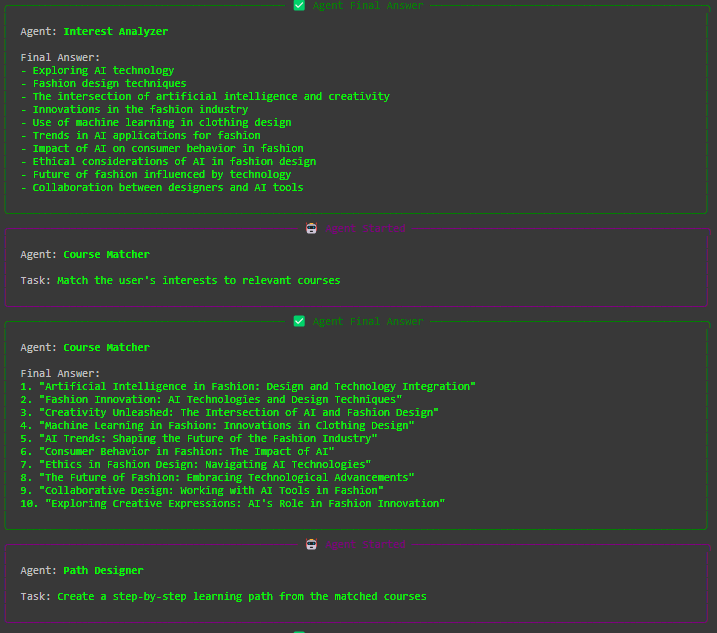

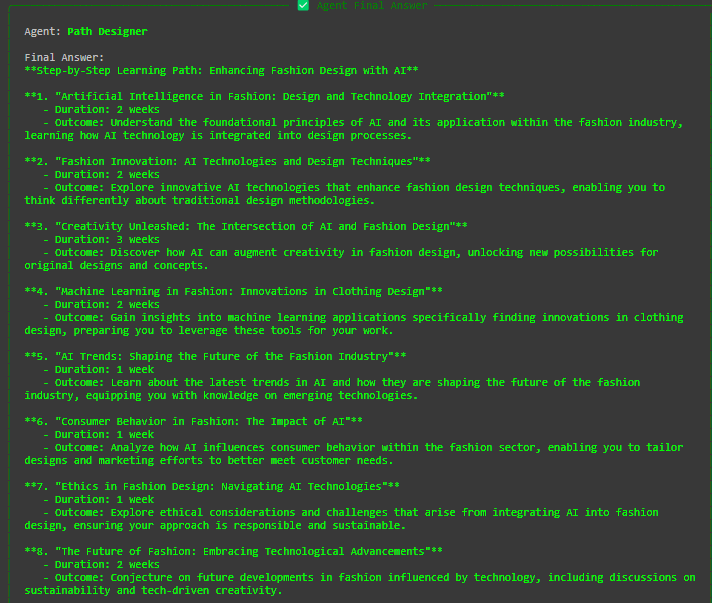

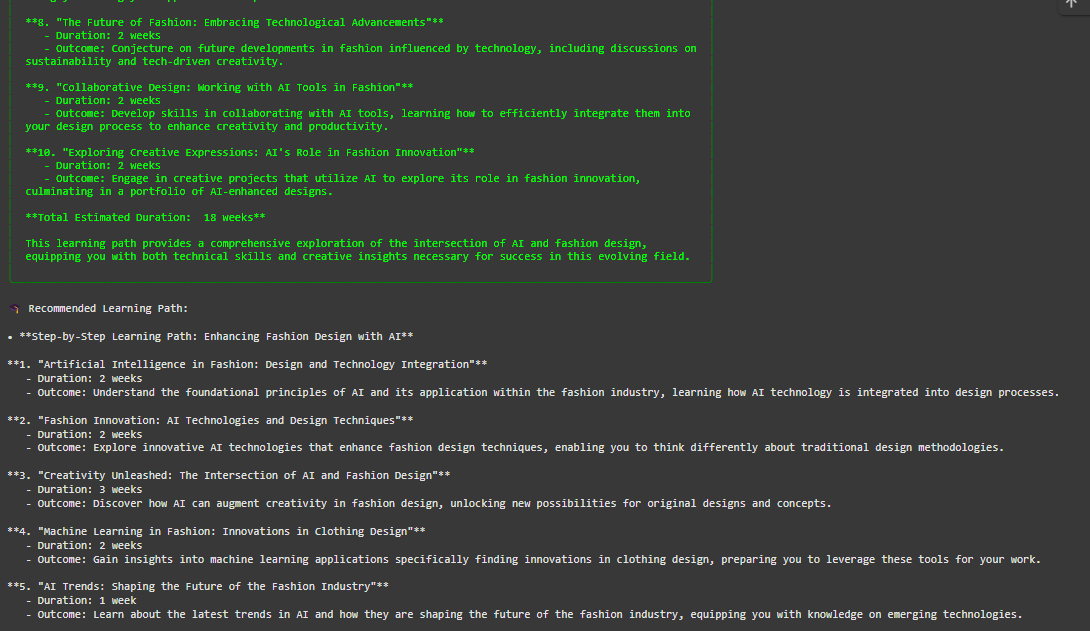

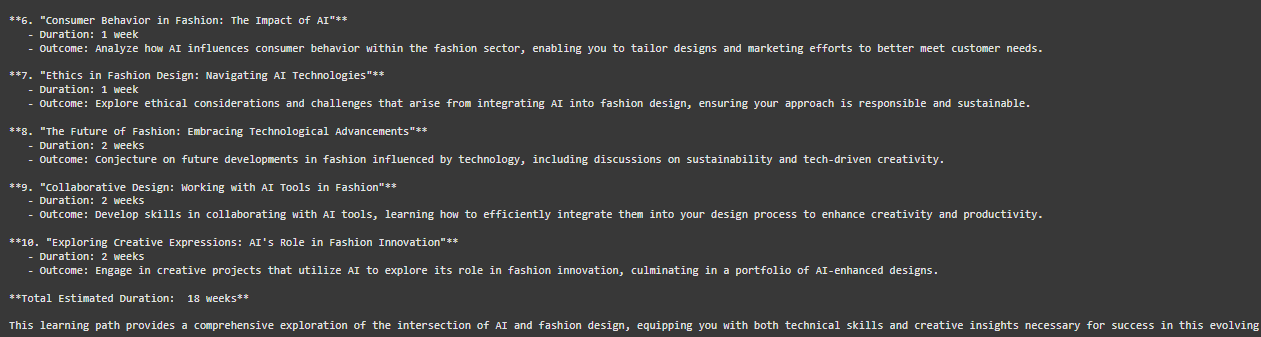